In [3]:
#import library
import numpy as np

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [4]:
#Import Dataset
df= pd.read_csv("heart_Data.csv") 

In [5]:
df.head(10)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
5,6,54.403626,29.333176,9.550046
6,7,49.056162,9.060846,7.624507
7,8,4.784604,12.835021,15.854654
8,9,65.730788,11.991297,3.067462
9,10,35.257449,23.277683,12.098484


In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865


In [8]:
#data wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [9]:
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


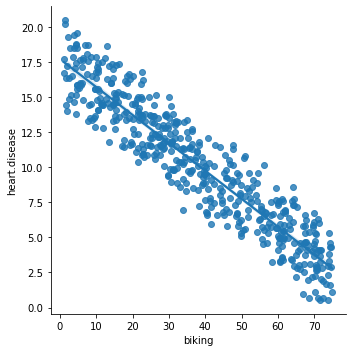

In [10]:
#A few plots in Seaborn to understand the data
sns.lmplot(x='biking', y='heart.disease', data=df)  


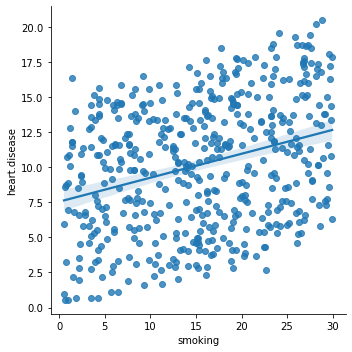

In [11]:
sns.lmplot(x='smoking', y='heart.disease', data=df)  

In [12]:
#assign x,y 
x_df = df.drop('heart.disease', axis=1)

In [13]:
y_df = df['heart.disease']

In [14]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)

In [15]:
from sklearn import linear_model

In [16]:
#Create Linear Regression object
model = linear_model.LinearRegression()

In [17]:
#Now let us call fit method to train the model using independent variables.
model.fit(X_train, y_train) #Indep variables, dep. variable to be predicted
print(model.score(X_train, y_train))  #Prints the R^2 value, a measure of how well



0.9785746181326694


In [18]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


90     18.689798
254     9.594623
283    20.185291
443    14.007490
336    15.977852
         ...    
391     2.654706
56     15.008634
438     3.402080
60      8.763930
208    17.560451
Name: heart.disease, Length: 100, dtype: float64 [18.22881049  9.43677654 19.69828803 14.9156304  16.5175097   8.0493171
 10.89345325  5.58794579 18.55102158 11.24860058  7.0211996   9.42561612
  4.07516254  7.37070498  6.56203588 16.8763469   4.05816828 15.09078204
  4.82451853 13.36017636  7.35206422  7.05600091 17.31415716  8.66093517
 11.91309149 13.27757779 15.96169607 15.97308757 13.00221475 13.98629821
  7.27838132 12.75485209  4.01219915  8.44354599  2.9254111   6.28503806
  7.79648804 12.11016167  5.88864634  6.75648801  6.80977982 14.28040301
 16.37849543 15.54257996 11.46372432  2.35110712  2.80018925  7.14653993
  6.28303362 11.49201591  5.69482599 11.53832865  9.55870638  7.29316115
  4.45212622  7.1848081  16.2224634   7.48586524  6.41715491  8.9768926
  6.5014482  15.1678416   6.22087475

In [19]:
#create model
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [20]:
#Model is ready. Let us check the coefficients
model = pickle.load(open('model.pkl','rb'))

In [21]:
print(model.predict([[20.1, 56.3]]))

[20.92765302]


C:\Users\ish35\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
